## Notebook de análisis

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [15]:
df = pd.read_csv("Data/HumanDevelopmentIndex.csv")
df.head()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Human Development Index (1990),Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),...,Material footprint per capita (tonnes) (2012),Material footprint per capita (tonnes) (2013),Material footprint per capita (tonnes) (2014),Material footprint per capita (tonnes) (2015),Material footprint per capita (tonnes) (2016),Material footprint per capita (tonnes) (2017),Material footprint per capita (tonnes) (2018),Material footprint per capita (tonnes) (2019),Material footprint per capita (tonnes) (2020),Material footprint per capita (tonnes) (2021)
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,49.56,49.68,55.49,59.76,64.95,75.61,65.97,68.95,68.95,68.95


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 880 entries, ISO3 to Material footprint per capita (tonnes) (2021)
dtypes: float64(876), object(4)
memory usage: 1.3+ MB


In [17]:
df_clean = df.copy()

# Reemplazar valores no válidos
df_clean = df_clean.replace({"..": np.nan, "--": np.nan, "—": np.nan})

# Eliminar duplicados por país
df_clean = df_clean.drop_duplicates(subset=["Country"], keep="first")

# Identificar columnas categóricas
cat_cols = ["Country", "Human Development Groups", "UNDP Developing Regions"]
num_cols = [c for c in df_clean.columns if c not in cat_cols]

# Convertir columnas numéricas
for col in num_cols:
    df_clean[col] = (
        df_clean[col]
        .astype(str)
        .str.replace(",", "")
        .str.strip()
    )
    df_clean[col] = pd.to_numeric(df_clean[col], errors="ignore")

# Rellenar nulos numéricos con mediana
for col in num_cols:
    if pd.api.types.is_numeric_dtype(df_clean[col]):
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Rellenar nulos categóricos
for col in ["Human Development Groups", "UNDP Developing Regions"]:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna("Unknown")

df_clean.head()

/var/folders/cb/v4v9k1yn78qf91xmdzfrcbwh0000gn/T/ipykernel_66322/1424610465.py:21: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_clean[col] = pd.to_numeric(df_clean[col], errors="ignore")
/var/folders/cb/v4v9k1yn78qf91xmdzfrcbwh0000gn/T/ipykernel_66322/1424610465.py:21: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_clean[col] = pd.to_numeric(df_clean[col], errors="ignore")
/var/folders/cb/v4v9k1yn78qf91xmdzfrcbwh0000gn/T/ipykernel_66322/1424610465.py:21: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_clean[col] = pd.to_numeric(df_clean[col], errors="ignore")
/var/folders/cb/v4v9k1yn78qf91xmdzfrcbwh0000gn/T/ipykernel_66322/1424610465.

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Human Development Index (1990),Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),...,Material footprint per capita (tonnes) (2012),Material footprint per capita (tonnes) (2013),Material footprint per capita (tonnes) (2014),Material footprint per capita (tonnes) (2015),Material footprint per capita (tonnes) (2016),Material footprint per capita (tonnes) (2017),Material footprint per capita (tonnes) (2018),Material footprint per capita (tonnes) (2019),Material footprint per capita (tonnes) (2020),Material footprint per capita (tonnes) (2021)
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,AGO,Angola,Medium,SSA,148.0,nan,nan,nan,nan,nan,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
3,AND,Andorra,Very High,Unknown,40.0,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,49.56,49.68,55.49,59.76,64.95,75.61,65.97,68.95,68.95,68.95


In [18]:
df_clean.describe(include="all")

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Human Development Index (1990),Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),...,Material footprint per capita (tonnes) (2012),Material footprint per capita (tonnes) (2013),Material footprint per capita (tonnes) (2014),Material footprint per capita (tonnes) (2015),Material footprint per capita (tonnes) (2016),Material footprint per capita (tonnes) (2017),Material footprint per capita (tonnes) (2018),Material footprint per capita (tonnes) (2019),Material footprint per capita (tonnes) (2020),Material footprint per capita (tonnes) (2021)
count,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195
unique,195,195,5,7,163,128,132,127,127,126,...,154,157,152,156,153,154,156,153,153,153
top,AFG,Afghanistan,Very High,SSA,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,1,1,66,46,4,54,54,54,54,54,...,38,38,38,38,38,38,38,38,38,38
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_2021 = df_clean[[
    "Country",
    "Human Development Index (2021)",
    "Gross National Income Per Capita (2021)",
    "Life Expectancy at Birth (2021)",
    "Expected Years of Schooling (2021)",
    "Mean Years of Schooling (2021)",
    "UNDP Developing Regions",
    "Human Development Groups"
]].copy()

df_2021 = df_2021.rename(columns={
    "Human Development Index (2021)": "HDI_2021",
    "Gross National Income Per Capita (2021)": "GNIpc_2021",
    "Life Expectancy at Birth (2021)": "LE_2021",
    "Expected Years of Schooling (2021)": "EYS_2021",
    "Mean Years of Schooling (2021)": "MYS_2021",
    "UNDP Developing Regions": "Region",
    "Human Development Groups": "HDI_Group"
})

df_2021.head()

,Country,HDI_2021,GNIpc_2021,LE_2021,EYS_2021,MYS_2021,Region,HDI_Group
0,Afghanistan,0.478,1824.190915,61.9824,10.26384398,2.98506999,SA,Low
1,Angola,0.586,5465.617791,61.6434,12.1721,5.417390823,SSA,Medium
2,Albania,0.796,14131.11039,76.4626,14.44799995,11.28645502,ECA,High
3,Andorra,0.858,51166.62661,80.3684,13.30023874,10.55511952,Unknown,Very High
4,United Arab Emirates,0.911,62573.59181,78.7104,15.71769047,12.69402981,AS,Very High


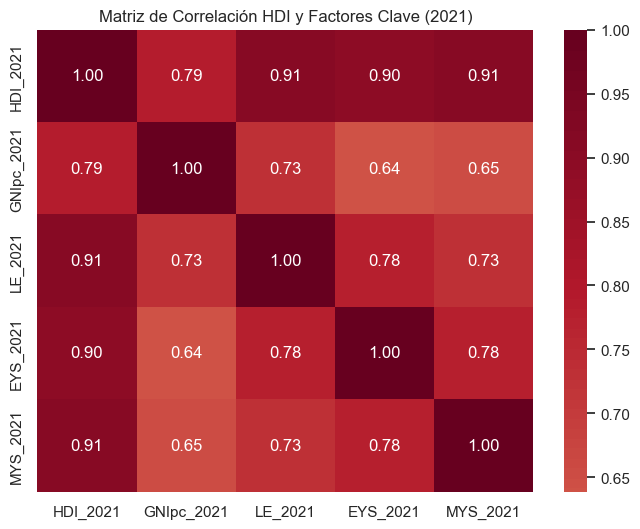

In [20]:
corr = df_2021[["HDI_2021","GNIpc_2021","LE_2021","EYS_2021","MYS_2021"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="RdBu_r", center=0, fmt=".2f")
plt.title("Matriz de Correlación HDI y Factores Clave (2021)")
plt.show()

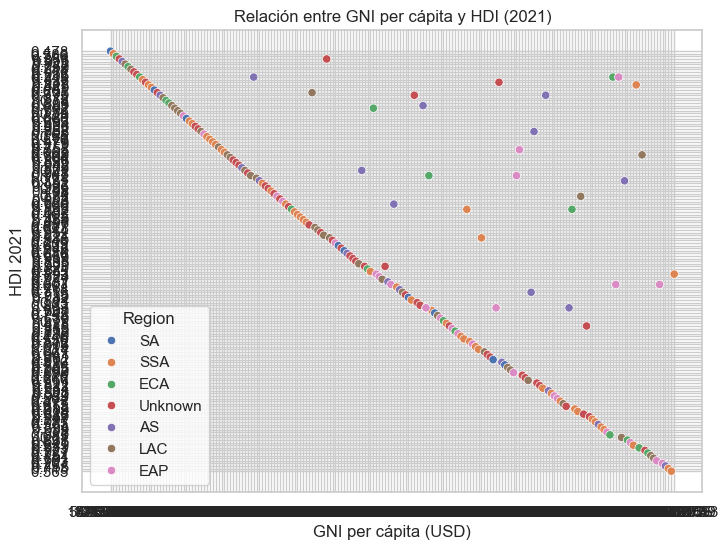

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_2021,
    x="GNIpc_2021",
    y="HDI_2021",
    hue="Region"
)
plt.title("Relación entre GNI per cápita y HDI (2021)")
plt.xlabel("GNI per cápita (USD)")
plt.ylabel("HDI 2021")
plt.show()

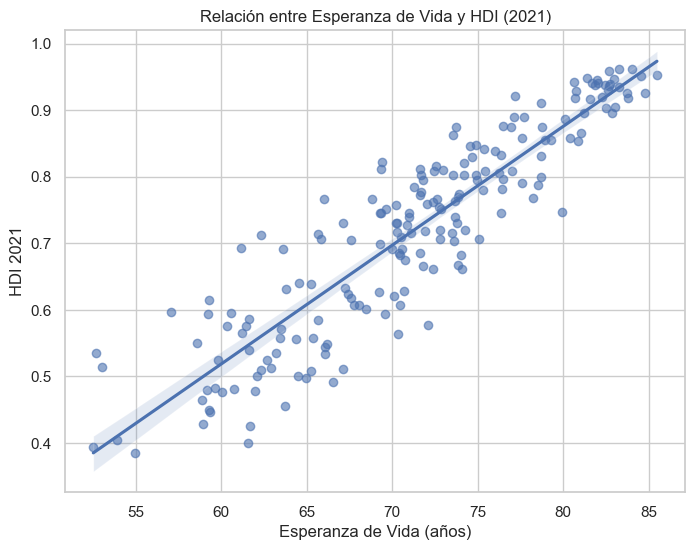

In [23]:
# --- Asegurar que las columnas sean realmente numéricas ---
df_2021["LE_2021"] = (
    df_2021["LE_2021"]
    .astype(str)
    .str.replace(",", "")
    .str.strip()
)
df_2021["LE_2021"] = pd.to_numeric(df_2021["LE_2021"], errors="coerce")

df_2021["HDI_2021"] = (
    df_2021["HDI_2021"]
    .astype(str)
    .str.replace(",", "")
    .str.strip()
)
df_2021["HDI_2021"] = pd.to_numeric(df_2021["HDI_2021"], errors="coerce")

# --- Eliminar filas sin datos numéricos para graficar bien ---
df_2021_plot = df_2021.dropna(subset=["LE_2021", "HDI_2021"])

# --- Gráfico ---
plt.figure(figsize=(8,6))
sns.regplot(
    data=df_2021_plot,
    x="LE_2021",
    y="HDI_2021",
    scatter_kws={"alpha": 0.6}
)
plt.title("Relación entre Esperanza de Vida y HDI (2021)")
plt.xlabel("Esperanza de Vida (años)")
plt.ylabel("HDI 2021")
plt.show()

In [24]:
hdi_cols = [c for c in df_clean.columns if c.startswith("Human Development Index (")]
years = [int(c.split("(")[1].split(")")[0]) for c in hdi_cols]

hdi_long = df_clean[["Country"] + hdi_cols].melt(
    id_vars="Country",
    value_vars=hdi_cols,
    var_name="Year",
    value_name="HDI"
)

hdi_long["Year"] = hdi_long["Year"].str.extract(r"(\d{4})").astype(int)

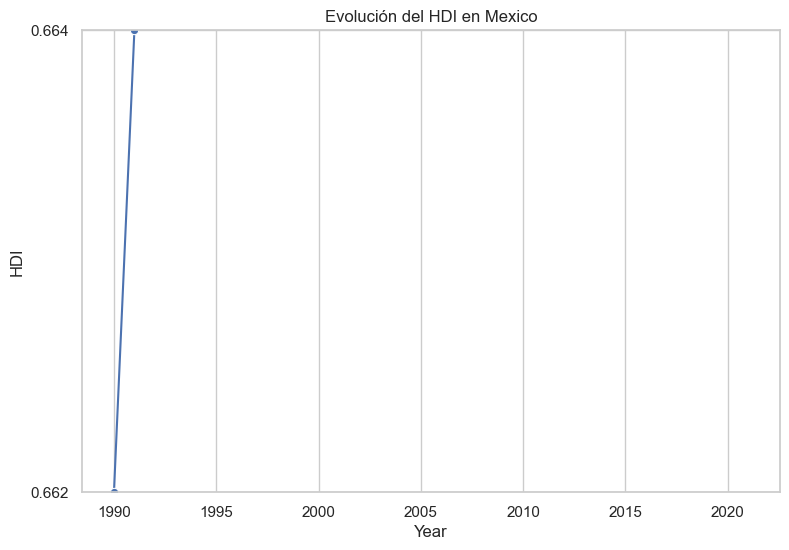

In [25]:
country = "Mexico"  
temp = hdi_long[hdi_long["Country"] == country]

plt.figure(figsize=(9,6))
sns.lineplot(data=temp, x="Year", y="HDI", marker="o")
plt.title(f"Evolución del HDI en {country}")
plt.ylim(0,1)
plt.show()

In [27]:
# Partimos de hdi_long con columnas: Country, Year, HDI

# 1. Asegurar que HDI sea numérico
hdi_long["HDI"] = (
    hdi_long["HDI"]
    .astype(str)
    .str.replace(",", "")
    .str.strip()
)
hdi_long["HDI"] = pd.to_numeric(hdi_long["HDI"], errors="coerce")

# 2. Definir años de inicio y fin
start_year = 1990
end_year   = 2021

# 3. Extraer HDI de cada año
start_df = (
    hdi_long[hdi_long["Year"] == start_year][["Country", "HDI"]]
    .rename(columns={"HDI": "HDI_start"})
)

end_df = (
    hdi_long[hdi_long["Year"] == end_year][["Country", "HDI"]]
    .rename(columns={"HDI": "HDI_end"})
)

# 4. Unir los dos años por país
trend = pd.merge(start_df, end_df, on="Country", how="inner")

# 5. Asegurar que las columnas sean numéricas (por si acaso)
trend["HDI_start"] = pd.to_numeric(trend["HDI_start"], errors="coerce")
trend["HDI_end"]   = pd.to_numeric(trend["HDI_end"], errors="coerce")

# 6. Eliminar filas sin datos válidos
trend = trend.dropna(subset=["HDI_start", "HDI_end"])

# 7. Calcular el cambio
trend["HDI_change"] = trend["HDI_end"] - trend["HDI_start"]

# 8. Clasificar tendencia
trend["Trend"] = trend["HDI_change"].apply(
    lambda x: "Mejora" if x >= 0.05 else ("Retroceso" if x <= -0.02 else "Estancado")
)

trend.head()

,Country,HDI_start,HDI_end,HDI_change,Trend
0,Afghanistan,0.273,0.478,0.205,Mejora
2,Albania,0.647,0.796,0.149,Mejora
4,United Arab Emirates,0.728,0.911,0.183,Mejora
5,Argentina,0.723,0.842,0.119,Mejora
6,Armenia,0.656,0.759,0.103,Mejora


/var/folders/cb/v4v9k1yn78qf91xmdzfrcbwh0000gn/T/ipykernel_66322/2231023384.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_up, x="HDI_change", y="Country", palette="Greens")


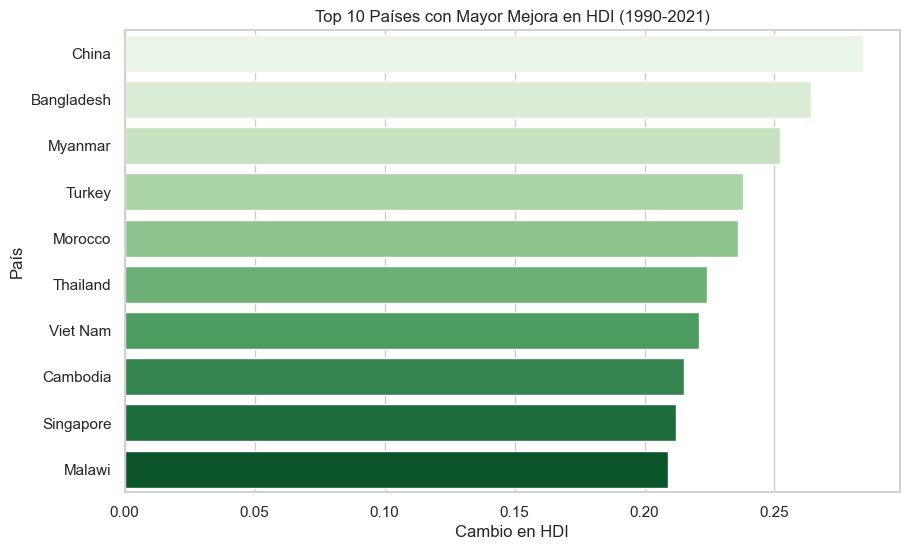

In [28]:
top_up = trend.sort_values("HDI_change", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_up, x="HDI_change", y="Country", palette="Greens")
plt.title("Top 10 Países con Mayor Mejora en HDI (1990-2021)")
plt.xlabel("Cambio en HDI")
plt.ylabel("País")
plt.show()

In [29]:
print("""
RESUMEN DEL ANÁLISIS

- La mayoría de los países muestran una tendencia positiva en su HDI.
- Existen casos de estancamiento o retroceso vinculados a crisis políticas o económicas.
- Países con alto ingreso pueden tener bajo HDI, evidenciando desigualdad interna.
- Los factores con mayor correlación con el HDI son la esperanza de vida y la educación.
- El ingreso influye, pero su relación con el HDI no siempre es lineal.
""")


RESUMEN DEL ANÁLISIS

- La mayoría de los países muestran una tendencia positiva en su HDI.
- Existen casos de estancamiento o retroceso vinculados a crisis políticas o económicas.
- Países con alto ingreso pueden tener bajo HDI, evidenciando desigualdad interna.
- Los factores con mayor correlación con el HDI son la esperanza de vida y la educación.
- El ingreso influye, pero su relación con el HDI no siempre es lineal.

